In [128]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
import MLP
import layer
importlib.reload(MLP)
importlib.reload(layer)
from MLP import MLP

In [129]:
input_data = [[0,0],
              [0,1],
              [1,0],
              [1,1]]
input_data = np.array(input_data)
labels = np.array([1,0,0,1]).reshape((len(input_data), 1))

In [170]:
structure=[2,np.shape(labels)[1]]
act_func=["sigmoid","sigmoid"]
start=[1,]*2

netw = MLP(structure, func=act_func,
           starting_points=start)

In [171]:
N_epoch = 2000
learning_rate=2
lamb=0
batch_size = -1 #-1 for batch gradient descent
alpha=0
nesterov=False
netw.train(input_data, labels, input_data, labels,
           epoch = N_epoch,
           batch_size=batch_size,
           eta = learning_rate, lamb = lamb,alpha=alpha,
           nesterov=nesterov)

Epoch 2000:  [train MEE = 0.0195]  [val MEE = 0.0195]                              
Elapsed time: 1.3015592098236084 s


data  label  out
[0 0] [1] [0.98239659] predicted
[0 1] [0] [0.01864797] predicted
[1 0] [0] [0.01860026] predicted
[1 1] [1] [0.97696905] predicted


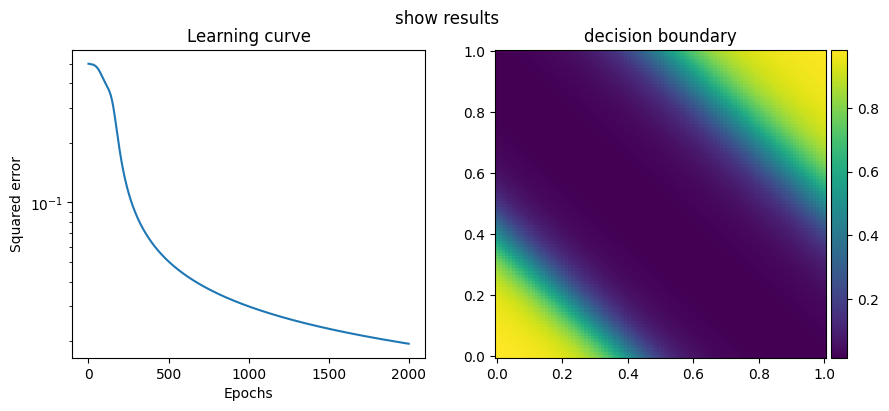

In [177]:
def plot_results(network):
    train_pred = network.predict(input_data)
    print('data  label  out')
    for x, d, o in zip(input_data, labels, train_pred):
        if np.abs(d-o) < 0.5: s = 'predicted'
        else: s = 'not predicted'
        print(x, d, o, s)
    
    
    from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

    fig, ax = plt.subplots(1, 2, figsize = (10,4))

    x = np.arange(len(network.train_MEE))

    ax0 = ax[0]
    ax0.plot(x,network.train_MEE)
    ax0.set_title("Learning curve")
    ax0.set_xlabel("Epochs")
    ax0.set_ylabel("Squared error")
    ax0.set_yscale("log")
    
    ax1 = ax[1]
    x_arr = np.linspace(0,1,100)
    y_arr = np.linspace(0,1,100)
    X, Y = np.meshgrid(x_arr, y_arr)
    Z = np.empty(X.shape)
    for i, x in enumerate(x_arr):
        for j, y in enumerate(y_arr):
            Z[i][j] = netw.predict(np.array([[x,y]]))[0][0]
    c = ax1.pcolormesh(X, Y, Z, shading='auto')
    ax1.set_title('decision boundary')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(c, cax = cax)
    plt.suptitle('show results')
    plt.show()


plot_results(netw)